In [104]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
df=pd.read_csv('bank_transactions.csv')
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [106]:
df.shape

(1048567, 9)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [108]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [109]:
df.columns=df.columns.str.lower()
df.columns

Index(['transactionid', 'customerid', 'customerdob', 'custgender',
       'custlocation', 'custaccountbalance', 'transactiondate',
       'transactiontime', 'transactionamount (inr)'],
      dtype='object')

In [110]:
listt=[]
for col in df.columns:
    dtypes=df[col].dtypes
    nunique=df[col].nunique()
    sum_null=df[col].isnull().sum()
    listt.append((dtypes,nunique,sum_null))
data=pd.DataFrame(listt,columns=['dtypes','nunique','sum_null'])  
data.insert(0, 'column_names', df.columns)
data

,column_names,dtypes,nunique,sum_null
0,transactionid,object,1048567,0
1,customerid,object,884265,0
2,customerdob,object,17254,3397
3,custgender,object,3,1100
4,custlocation,object,9355,151
5,custaccountbalance,float64,161328,2369
6,transactiondate,object,55,0
7,transactiontime,int64,81918,0
8,transactionamount (inr),float64,93024,0


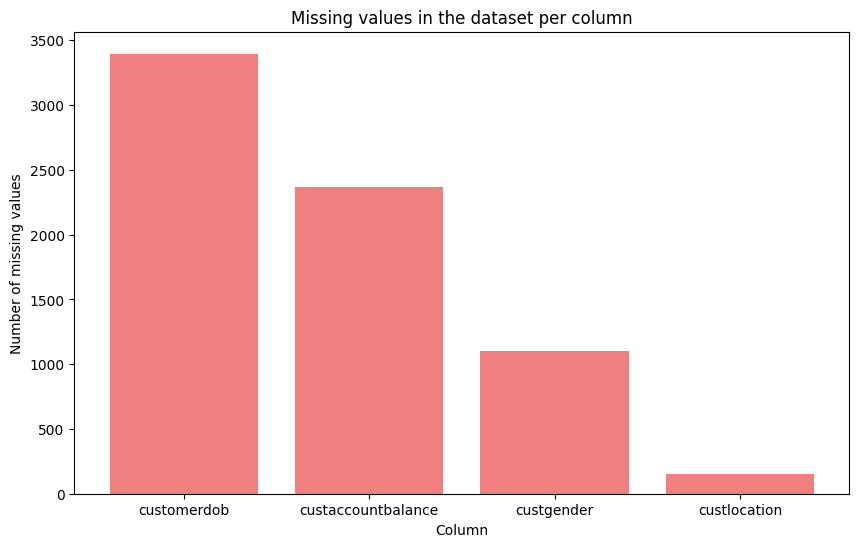

In [111]:
missing_values_per_column = df.isnull().sum()

missing_values = missing_values_per_column[missing_values_per_column > 0]

missing_values = missing_values.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(missing_values.index, missing_values.values, color='lightcoral')
plt.title("Missing values in the dataset per column")
plt.xlabel("Column")
plt.ylabel("Number of missing values");

In [112]:
df[df['custaccountbalance']==0]['custaccountbalance']

663        0.0
982        0.0
2051       0.0
2836       0.0
3270       0.0
          ... 
1045262    0.0
1045488    0.0
1046305    0.0
1047765    0.0
1048242    0.0
Name: custaccountbalance, Length: 2711, dtype: float64

### nan values handle


In [113]:
print(df['custgender'].value_counts())
print( )

df['custgender'].fillna(df['custgender'].mode()[0], inplace=True)

df['custgender'].isnull().any()

custgender
M    765530
F    281936
T         1
Name: count, dtype: int64



False

In [114]:
df.dropna(subset=['customerdob','custlocation','custaccountbalance'],inplace=True)

In [115]:
df.isnull().sum()

transactionid              0
customerid                 0
customerdob                0
custgender                 0
custlocation               0
custaccountbalance         0
transactiondate            0
transactiontime            0
transactionamount (inr)    0
dtype: int64

### check value counts

In [116]:
df['customerdob'].value_counts()

customerdob
1/1/1800    57165
1/1/89        809
1/1/90        784
6/8/91        698
1/1/91        665
            ...  
8/11/53         1
12/5/55         1
2/12/61         1
24/9/57         1
24/10/44        1
Name: count, Length: 17234, dtype: int64

In [117]:
df=df.drop(df[df['customerdob']=='1/1/1800'].index)

In [118]:
df['customerdob'].value_counts()

customerdob
1/1/89      809
1/1/90      784
6/8/91      698
1/1/91      665
1/1/92      631
           ... 
8/11/53       1
12/5/55       1
2/12/61       1
24/9/57       1
24/10/44      1
Name: count, Length: 17233, dtype: int64

In [119]:
df['customerdob'] = pd.to_datetime(df['customerdob'])
df['year'] = df['customerdob'].dt.year
df['year']

C:\Users\hp\AppData\Local\Temp\ipykernel_7020\2512640376.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['customerdob'] = pd.to_datetime(df['customerdob'])


0          1994
1          2057
2          1996
3          2073
4          1988
           ... 
1048562    1990
1048563    1992
1048564    1989
1048565    1978
1048566    1984
Name: year, Length: 985486, dtype: int32

In [120]:
df['transactiondate']=pd.to_datetime(df['transactiondate'])
df['td_year'] = df['transactiondate'].dt.year
df['td_year']

C:\Users\hp\AppData\Local\Temp\ipykernel_7020\1628818358.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['transactiondate']=pd.to_datetime(df['transactiondate'])


0          2016
1          2016
2          2016
3          2016
4          2016
           ... 
1048562    2016
1048563    2016
1048564    2016
1048565    2016
1048566    2016
Name: td_year, Length: 985486, dtype: int32

In [121]:
df.head()

,transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount (inr),year,td_year
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,1994,2016
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,2057,2016
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,1996,2016
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,2073,2016
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,1988,2016


In [122]:
df1=df.copy()

In [123]:
df1.loc[df1['year'] > df1['td_year'], 'year'] = df1['year'].mode()[0]

In [124]:
df1['year'].mode()[0]

1990

In [125]:
df1.shape

(985486, 11)

In [126]:

df1["customer_age"] = df1["td_year"]-df1["year"]

In [127]:
df1.head()

,transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount (inr),year,td_year,customer_age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,1994,2016,22
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,1990,2016,26
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,1996,2016,20
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,1990,2016,26
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,1988,2016,28


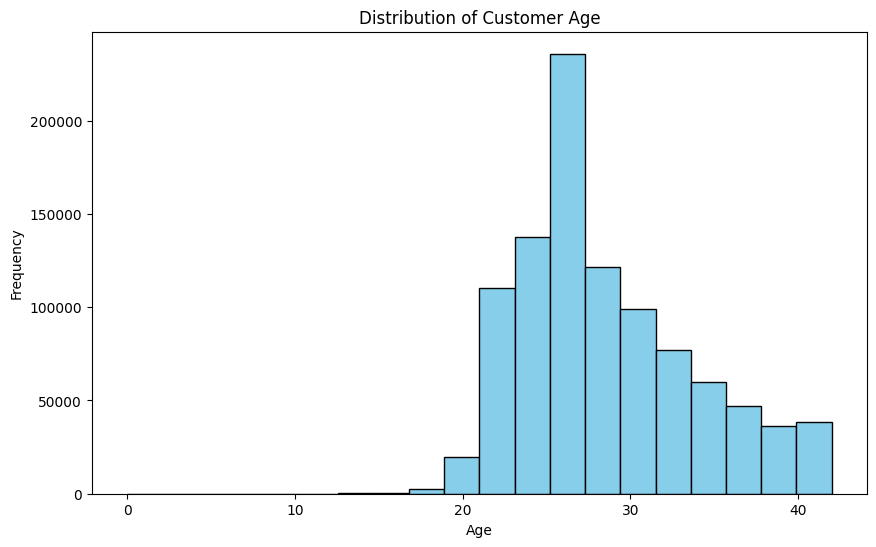

In [128]:
plt.figure(figsize=(10, 6))

plt.hist(df1['customer_age'], bins=20, color='skyblue', edgecolor='black');

plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency');


In [129]:
#### 2ci hal


df = df[df['year'] < df['td_year']]
df.head()

,transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount (inr),year,td_year
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,1994,2016
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,1996,2016
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,1988,2016
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,173806,566.0,1992,2016
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2016-02-08,170537,148.0,1982,2016


In [130]:
print(df.shape)
print(df1.shape)

(891451, 11)
(985486, 12)


In [131]:
df.duplicated().sum()

0

### work with columns

In [132]:
df["customer_age"] = df["td_year"]-df["year"]


In [133]:
df["customer_age"]

0          22
2          20
4          28
6          24
7          34
           ..
1048562    26
1048563    24
1048564    27
1048565    38
1048566    32
Name: customer_age, Length: 891451, dtype: int32

In [134]:
df.drop('customerdob',axis=1,inplace=True)

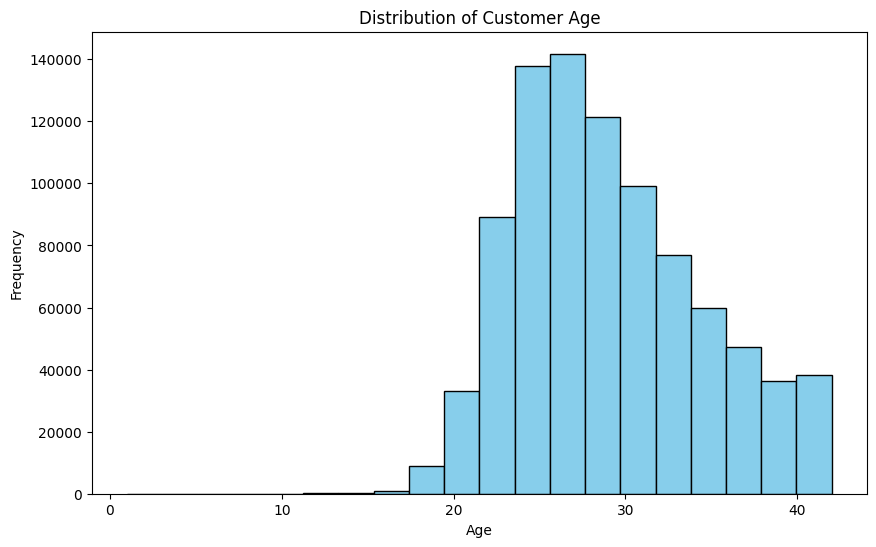

In [135]:
plt.figure(figsize=(10, 6))

plt.hist(df['customer_age'], bins=20, color='skyblue', edgecolor='black');

plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency');


In [136]:
df['transactiondate_min']=df['transactiondate'] # ==> to calculate the minimum (first transaction)
df['transactiondate_max']=df['transactiondate']

In [137]:
#### customedid nunique----770140
#### datanin shape----891451	
print(891451-770140)

121311


In [138]:
new_df = df.groupby("customerid").agg({
                                        "transactionid" : "count",
                                        "custgender" : "first",
                                        "custlocation":"first",
                                        "custaccountbalance"  : "mean",
                                        "transactionamount (inr)" : "mean",
                                        "customer_age" : "max",
                                        "transactiondate_max":"max",
                                        "transactiondate_min":"min",
                                        "transactiondate":"median"
                        })

new_df = new_df.reset_index()
new_df.head()

,customerid,transactionid,custgender,custlocation,custaccountbalance,transactionamount (inr),customer_age,transactiondate_max,transactiondate_min,transactiondate
0,C1010011,2,F,NOIDA,76340.635,2553.0,33,2016-09-26,2016-09-08,2016-09-17
1,C1010012,1,M,MUMBAI,24204.490,1499.0,22,2016-08-14,2016-08-14,2016-08-14
2,C1010014,2,F,MUMBAI,100112.950,727.5,32,2016-07-08,2016-01-08,2016-04-08
3,C1010018,1,F,CHAMPARAN,496.180,30.0,26,2016-09-15,2016-09-15,2016-09-15
4,C1010028,1,F,DELHI,296828.370,557.0,28,2016-08-29,2016-08-29,2016-08-29


In [139]:
new_df.shape

(770140, 10)

In [140]:
import re

new_df['activity']=new_df['transactiondate_max']-new_df['transactiondate_min']
new_df['activity']=new_df['activity'].astype(str)

#x daki d+ olan sozleri tapir
new_df['activity']=new_df['activity'].apply(lambda x :re.search('\d+',x).group())

new_df['activity']=new_df['activity'].astype(int)

In [141]:
new_df.head()

,customerid,transactionid,custgender,custlocation,custaccountbalance,transactionamount (inr),customer_age,transactiondate_max,transactiondate_min,transactiondate,activity
0,C1010011,2,F,NOIDA,76340.635,2553.0,33,2016-09-26,2016-09-08,2016-09-17,18
1,C1010012,1,M,MUMBAI,24204.490,1499.0,22,2016-08-14,2016-08-14,2016-08-14,0
2,C1010014,2,F,MUMBAI,100112.950,727.5,32,2016-07-08,2016-01-08,2016-04-08,182
3,C1010018,1,F,CHAMPARAN,496.180,30.0,26,2016-09-15,2016-09-15,2016-09-15,0
4,C1010028,1,F,DELHI,296828.370,557.0,28,2016-08-29,2016-08-29,2016-08-29,0


In [142]:
new_df['activity'].replace({0: 1}, inplace=True)


In [143]:
new_df.head()

,customerid,transactionid,custgender,custlocation,custaccountbalance,transactionamount (inr),customer_age,transactiondate_max,transactiondate_min,transactiondate,activity
0,C1010011,2,F,NOIDA,76340.635,2553.0,33,2016-09-26,2016-09-08,2016-09-17,18
1,C1010012,1,M,MUMBAI,24204.490,1499.0,22,2016-08-14,2016-08-14,2016-08-14,1
2,C1010014,2,F,MUMBAI,100112.950,727.5,32,2016-07-08,2016-01-08,2016-04-08,182
3,C1010018,1,F,CHAMPARAN,496.180,30.0,26,2016-09-15,2016-09-15,2016-09-15,1
4,C1010028,1,F,DELHI,296828.370,557.0,28,2016-08-29,2016-08-29,2016-08-29,1


In [144]:
new_df.drop(['transactiondate_max','transactiondate_min','transactiondate','customerid'],axis=1,inplace=True)
new_df.head()


,transactionid,custgender,custlocation,custaccountbalance,transactionamount (inr),customer_age,activity
0,2,F,NOIDA,76340.635,2553.0,33,18
1,1,M,MUMBAI,24204.490,1499.0,22,1
2,2,F,MUMBAI,100112.950,727.5,32,182
3,1,F,CHAMPARAN,496.180,30.0,26,1
4,1,F,DELHI,296828.370,557.0,28,1


In [145]:
new_df.rename(columns={'transactionid': 'transaction_number'}, inplace=True)
new_df.head()

,transaction_number,custgender,custlocation,custaccountbalance,transactionamount (inr),customer_age,activity
0,2,F,NOIDA,76340.635,2553.0,33,18
1,1,M,MUMBAI,24204.490,1499.0,22,1
2,2,F,MUMBAI,100112.950,727.5,32,182
3,1,F,CHAMPARAN,496.180,30.0,26,1
4,1,F,DELHI,296828.370,557.0,28,1


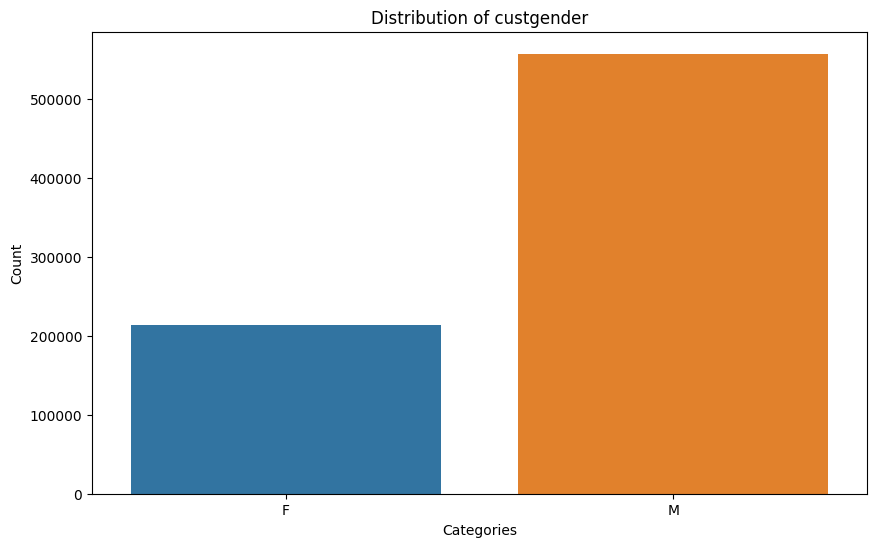

In [146]:
plt.figure(figsize=(10, 6))
sns.countplot(data=new_df, x='custgender')
plt.title('Distribution of custgender')
plt.xlabel('Categories')
plt.ylabel('Count');

In [147]:
#### custlocation qruplasdirmaq alinmayacaq

print(new_df['custlocation'].nunique())

print(new_df.shape)

7349
(770140, 7)


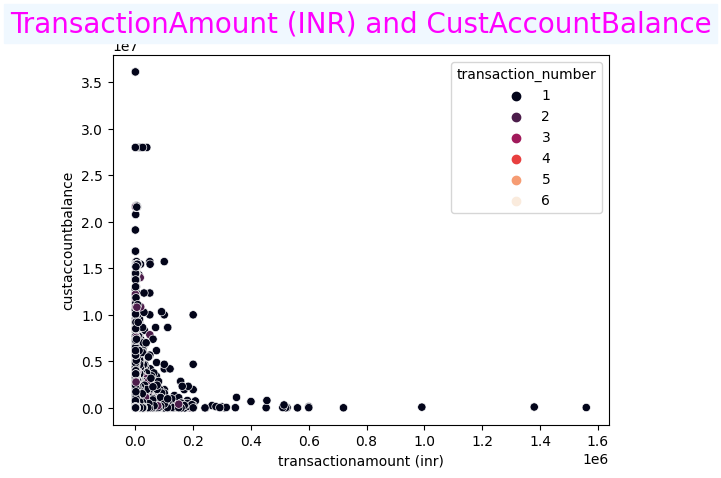

In [148]:
sns.scatterplot(x='transactionamount (inr)',y='custaccountbalance',data=new_df,palette='rocket',hue='transaction_number')#,size='activity' )
plt.title("TransactionAmount (INR) and CustAccountBalance",
          fontsize='20',
          backgroundcolor='AliceBlue',
          color='magenta');

In [149]:
new_df_cor=new_df.corr(numeric_only=True) 
new_df_cor

,transaction_number,custaccountbalance,transactionamount (inr),customer_age,activity
transaction_number,1.000000,0.000331,-0.000616,0.207215,0.733247
custaccountbalance,0.000331,1.000000,0.064229,0.119901,-0.001133
transactionamount (inr),-0.000616,0.064229,1.000000,0.068145,-0.000626
customer_age,0.207215,0.119901,0.068145,1.000000,0.154749
activity,0.733247,-0.001133,-0.000626,0.154749,1.000000


<Axes: >

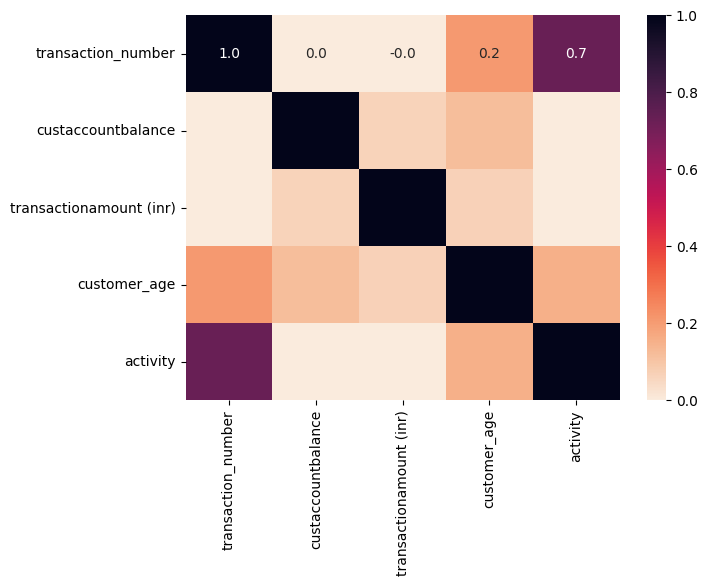

In [150]:
plt.figure(figsize=(7,5))
sns.heatmap(new_df_cor,cmap='rocket_r',annot=True,fmt='.1f',linecolor='white',)

In [151]:
from scipy.stats import zscore

columns_to_check = ['transaction_number', 'custaccountbalance', 'transactionamount (inr)', 'customer_age', 'activity']

for column in columns_to_check:
    z_scores = zscore(new_df[column])
    threshold = 3

    outlier_indices = np.where(np.abs(z_scores) > threshold)[0]
    
    new_df = new_df.drop(outlier_indices, axis=0).reset_index(drop=True)


In [152]:
print(new_df.shape)

new_df.head()



(720279, 7)


,transaction_number,custgender,custlocation,custaccountbalance,transactionamount (inr),customer_age,activity
0,2,F,NOIDA,76340.635,2553.0,33,18
1,1,M,MUMBAI,24204.490,1499.0,22,1
2,1,F,CHAMPARAN,496.180,30.0,26,1
3,1,F,DELHI,296828.370,557.0,28,1
4,2,M,VAPI,5200.155,932.0,32,31


In [155]:
new_df1=new_df.copy()
new_df1.head()

,transaction_number,custgender,custlocation,custaccountbalance,transactionamount (inr),customer_age,activity
0,2,F,NOIDA,76340.635,2553.0,33,18
1,1,M,MUMBAI,24204.490,1499.0,22,1
2,1,F,CHAMPARAN,496.180,30.0,26,1
3,1,F,DELHI,296828.370,557.0,28,1
4,2,M,VAPI,5200.155,932.0,32,31


### kmeans without preprocessing

In [50]:
from sklearn.cluster import KMeans

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [69]:
new_df

,transaction_number,custgender,custlocation,custaccountbalance,transactionamount (inr),customer_age,activity,Cluster
0,2,F,NOIDA,76340.635,2553.0,33,18,0
1,1,M,MUMBAI,24204.490,1499.0,22,1,0
2,1,F,CHAMPARAN,496.180,30.0,26,1,0
3,1,F,DELHI,296828.370,557.0,28,1,2
4,2,M,VAPI,5200.155,932.0,32,31,0
...,...,...,...,...,...,...,...,...
720274,1,M,BHIWANDI,133067.230,691.0,26,1,0
720275,1,M,BANGALORE,96063.460,222.0,20,1,0
720276,1,M,GUNTUR,5559.750,126.0,23,1,0
720277,1,M,CHENNAI,35295.920,50.0,21,1,0


In [70]:
X = new_df[["custaccountbalance","transactionamount (inr)",'customer_age','activity','transaction_number']].values
X

array([[7.6340635e+04, 2.5530000e+03, 3.3000000e+01, 1.8000000e+01,
        2.0000000e+00],
       [2.4204490e+04, 1.4990000e+03, 2.2000000e+01, 1.0000000e+00,
        1.0000000e+00],
       [4.9618000e+02, 3.0000000e+01, 2.6000000e+01, 1.0000000e+00,
        1.0000000e+00],
       ...,
       [5.5597500e+03, 1.2600000e+02, 2.3000000e+01, 1.0000000e+00,
        1.0000000e+00],
       [3.5295920e+04, 5.0000000e+01, 2.1000000e+01, 1.0000000e+00,
        1.0000000e+00],
       [6.9689300e+03, 8.5500000e+02, 3.4000000e+01, 1.0000000e+00,
        1.0000000e+00]])

In [53]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

cluster_labels = kmeans.labels_
new_df['Cluster'] = cluster_labels

print("Count of data points in each cluster:")
print(new_df['Cluster'].value_counts())

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Count of data points in each cluster:
Cluster
0    648054
2     57720
1     14505
Name: count, dtype: int64


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:8

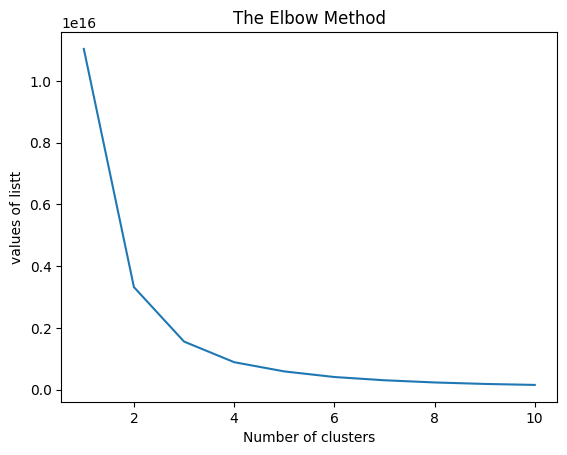

In [54]:
listt = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    listt.append(kmeans.inertia_)
plt.plot(range(1, 11), listt)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('values of listt');

In [55]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [56]:
kmeans.inertia_

1554204894902229.0

In [57]:
kmeans.cluster_centers_

array([[2.36136286e+04, 9.08042453e+02, 2.88348470e+01, 5.45362818e+00,
        1.09521906e+00],
       [7.31480709e+05, 1.80499836e+03, 3.25160025e+01, 5.24791796e+00,
        1.09160988e+00],
       [2.49875697e+05, 1.53092824e+03, 3.12906146e+01, 6.40364480e+00,
        1.11671657e+00]])

In [68]:
X[y_kmeans==0,0]

array([76340.635, 24204.49 ,   496.18 , ...,  5559.75 , 35295.92 ,
        6968.93 ])

C:\Users\hp\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


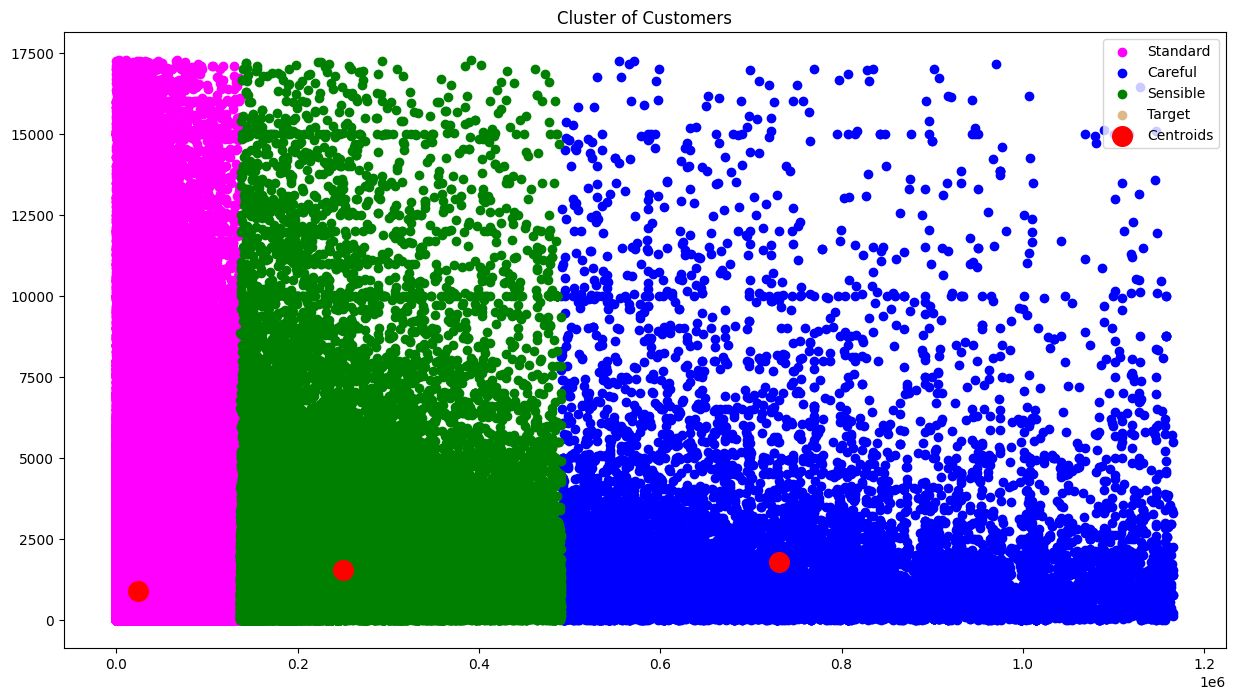

In [62]:
fig = plt.figure(figsize=(15, 8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c='magenta', label='Standard')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c='blue', label='Careful')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c='green', label='Sensible')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], c='burlywood', label='Target')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.legend()
plt.title('Cluster of Customers')
plt.show()


### encoding

In [156]:
new_df1.drop('custlocation',axis=1,inplace=True)
new_df1.head()

,transaction_number,custgender,custaccountbalance,transactionamount (inr),customer_age,activity
0,2,F,76340.635,2553.0,33,18
1,1,M,24204.490,1499.0,22,1
2,1,F,496.180,30.0,26,1
3,1,F,296828.370,557.0,28,1
4,2,M,5200.155,932.0,32,31


In [157]:
new_df1['custgender']=new_df1['custgender'].map({'M':1,'F':0})
new_df1.head()

,transaction_number,custgender,custaccountbalance,transactionamount (inr),customer_age,activity
0,2,0,76340.635,2553.0,33,18
1,1,1,24204.490,1499.0,22,1
2,1,0,496.180,30.0,26,1
3,1,0,296828.370,557.0,28,1
4,2,1,5200.155,932.0,32,31


In [158]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

columns_to_scale = ['custaccountbalance', 'transactionamount (inr)', 'customer_age', 'activity']

for column in columns_to_scale:
    new_df1[column] = scaler.fit_transform(new_df1[[column]])


In [159]:
new_df1.head()

,transaction_number,custgender,custaccountbalance,transactionamount (inr),customer_age,activity
0,2,0,0.164003,0.913659,0.729744,0.681185
1,1,1,-0.257253,0.302968,-1.331734,-0.247134
2,1,0,-0.448815,-0.548175,-0.582106,-0.247134
3,1,0,1.945528,-0.242830,-0.207292,-0.247134
4,2,1,-0.410807,-0.025554,0.542337,1.391076


### model

In [103]:
from sklearn.cluster import KMeans

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


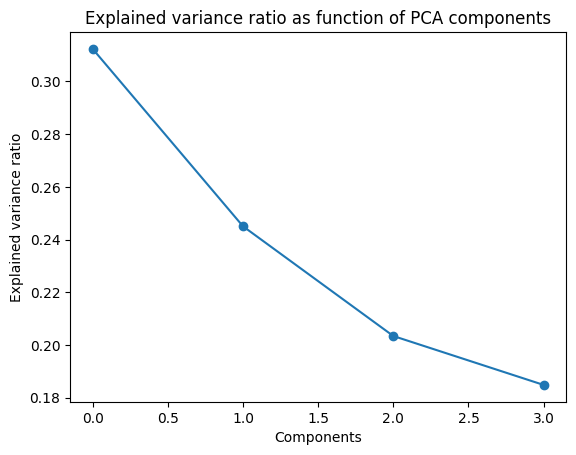

In [163]:
trial_pca=PCA(n_components=4)
trial_pca.fit(new_df1)
test=trial_pca.transform(new_df1)
plt.plot(list(trial_pca.explained_variance_ratio_),'-o')
plt.title('Explained variance ratio as function of PCA components')
plt.ylabel('Explained variance ratio')
plt.xlabel('Components');


In [164]:
new_df1_pca=PCA(n_components=3)
reduced_features=new_df1_pca.fit_transform(new_df1)
X_principal=pd.DataFrame(reduced_features)
X_principal.columns=['P1','P2','P3']

In [165]:
X_principal

,P1,P2,P3
0,1.279811,0.430848,0.588153
1,-0.893449,-0.349982,0.582267
2,-0.946691,0.054193,-0.077607
3,0.682865,-0.843581,-1.316858
4,0.642301,1.555106,0.269770
...,...,...,...
720274,-0.201344,-0.429035,-0.429659
720275,-1.178329,-0.325926,-0.278073
720276,-1.243194,-0.008509,0.016972
720277,-1.368556,-0.107117,-0.097056


In [166]:
kmeans_set = {"init":"random", "max_iter":300, "random_state":42}
kmeans = KMeans(n_clusters=5 , **kmeans_set)    
kmeans.fit(reduced_features)
X_principal['Label']=kmeans.labels_
X_principal.head()

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,P1,P2,P3,Label
0,1.279811,0.430848,0.588153,0
1,-0.893449,-0.349982,0.582267,3
2,-0.946691,0.054193,-0.077607,3
3,0.682865,-0.843581,-1.316858,0
4,0.642301,1.555106,0.269770,0


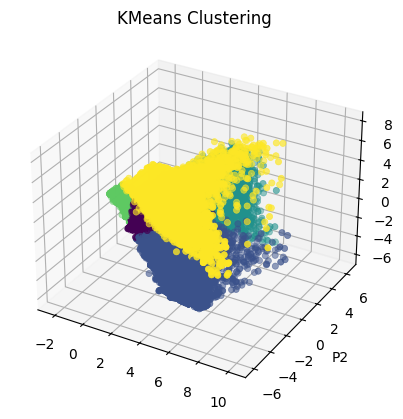

In [171]:
ax = plt.axes(projection='3d')
ax.scatter3D('P1','P2', 'P3', c = 'Label', data = X_principal, cmap='viridis',  linewidth=0.5)
ax.set_ylabel('P2')
ax.set_zlabel('P3')
plt.title('KMeans Clustering');

In [172]:
X_principal.drop(columns = ['Label'], inplace = True)
X_principal.head()

,P1,P2,P3
0,1.279811,0.430848,0.588153
1,-0.893449,-0.349982,0.582267
2,-0.946691,0.054193,-0.077607
3,0.682865,-0.843581,-1.316858
4,0.642301,1.555106,0.269770


In [173]:
X_principal=X_principal.sample(n=10000,random_state=69).reset_index(drop=True)
X_principal.shape

(10000, 3)

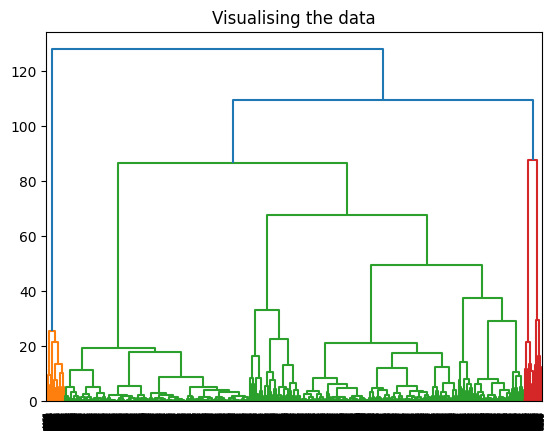

In [174]:
import scipy.cluster.hierarchy as shc


plt.title('Visualising the data')
Dendogram=shc.dendrogram((shc.linkage(X_principal,method='ward')))